In [15]:
from robust_mean import huberReg

In [10]:
import numpy as np
import math
from sklearn.linear_model import HuberRegressor
import numpy.random as rgt
import matplotlib.pyplot as plt
# ... other necessary imports ...

# Assuming your class definition `huberReg` is already provided above

In [ ]:
# Generate some sample data
n, d = 5000, 20  # Adjust n and d according to your needs
X = np.random.uniform(-1/np.sqrt(d), 1/np.sqrt(d), (n, d))
truebeta = np.random.normal(0, 1, d)
truebeta /= np.linalg.norm(truebeta)
Y = X.dot(truebeta) + np.random.normal(0, 4, n)  # Linear relationship with noise

# Create an instance of your class
noisy_huber_regression = huberReg(X, Y)

# Set initial parameters for noisy Huber regression
beta0 = np.zeros(d)
epsilon = 0.5
T = 5
delta = 0.0001
eta = 1
row_norms = np.linalg.norm(X, axis=1)

# Finding the maximum 2-norm among all rows
gamma = np.max(row_norms)
gamma

In [ ]:
# Run the noisy Huber regression
noisy_huber_result = huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=0.01, gamma=gamma)
print("Noisy Huber Regression Result:", noisy_huber_result[0])

# Ordinary Huber Regression for comparison
huber_reg = HuberRegressor().fit(X, Y)
ordinary_huber_coefficients = huber_reg.coef_
print("Ordinary Huber Regression Coefficients:", ordinary_huber_coefficients)

# Compare the results (You can use metrics like MSE, coefficients, predictions, etc.)

In [ ]:
def l2_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

In [ ]:
l2_distance(truebeta, noisy_huber_result[0])

In [ ]:
l2_distance(truebeta, huber_reg.coef_)

In [13]:
# Function to generate data
def generate_data(n, d):
    X = np.random.uniform(-1/np.sqrt(d), 1/np.sqrt(d), (n, d))
    truebeta = np.random.normal(0, 1, d)
    truebeta /= np.linalg.norm(truebeta)
    Y = X.dot(truebeta) + np.random.normal(0, 4, n)
    return X, Y, truebeta

# Function to calculate L2 distance
def l2_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

# Function to perform regression and calculate L2 error
def calculate_errors(n, d, T, delta, eta, epsilon):
    X, Y, truebeta = generate_data(n, d)
    beta0 = np.zeros(d)
    gamma = np.max(np.linalg.norm(X, axis=1))

    # Noisy Huber regression (to be implemented)
    noisy_huber_regression = huberReg(X, Y)
    # noisy_huber_result = huber_regression.noisy_huber_reg_lowdim(beta0, epsilon, T, delta, eta, gamma)
    # For demonstration purposes, using truebeta as the result
    noisy_huber_result = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=0.01, gamma=gamma)

    # Ordinary Huber Regression
    huber_reg = HuberRegressor().fit(X, Y)

    # Calculate L2 errors
    error_noisy_huber = l2_distance(truebeta, noisy_huber_result[0])
    error_ordinary_huber = l2_distance(truebeta, huber_reg.coef_)

    return error_noisy_huber, error_ordinary_huber

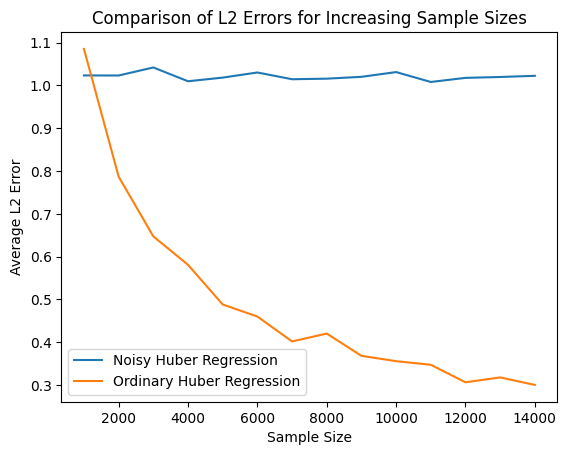

In [23]:
# Sample sizes to test
sample_sizes = np.arange(1000, 15000, 1000)
d = 5  # Number of features
T = 2
#delta = 10
eta = 1
epsilon = 0.5

# Store average errors
average_errors_noisy = []
average_errors_ordinary = []

# Iterate over sample sizes
for n in sample_sizes:
    errors_noisy = []
    errors_ordinary = []
    for _ in range(100):  # 100 repetitions
        error_noisy, error_ordinary = calculate_errors(n, d, T, 10/(n**1.1), eta, epsilon)
        errors_noisy.append(error_noisy)
        errors_ordinary.append(error_ordinary)

    # Compute average errors
    average_errors_noisy.append(np.mean(errors_noisy))
    average_errors_ordinary.append(np.mean(errors_ordinary))

# Plotting
plt.plot(sample_sizes, average_errors_noisy, label='Noisy Huber Regression')
plt.plot(sample_sizes, average_errors_ordinary, label='Ordinary Huber Regression')
plt.xlabel('Sample Size')
plt.ylabel('Average L2 Error')
plt.title('Comparison of L2 Errors for Increasing Sample Sizes')
plt.legend()
plt.show()
